In [121]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')
from sklearn.preprocessing import MinMaxScaler
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn import metrics
from scipy.stats.mstats import winsorize
from sklearn import svm
from xgboost import XGBRegressor


In [122]:
column_names = ['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX', 'PTRATIO', 'B', 'LSTAT', 'MEDV']

In [123]:
df = pd.read_csv('/content/housing.csv', header=None, delimiter=r"\s+", names=column_names)

In [124]:
df.head(10)

CRIM    ZN  INDUS  CHAS    NOX     RM    AGE     DIS  RAD    TAX  \
0  0.00632  18.0   2.31     0  0.538  6.575   65.2  4.0900    1  296.0   
1  0.02731   0.0   7.07     0  0.469  6.421   78.9  4.9671    2  242.0   
2  0.02729   0.0   7.07     0  0.469  7.185   61.1  4.9671    2  242.0   
3  0.03237   0.0   2.18     0  0.458  6.998   45.8  6.0622    3  222.0   
4  0.06905   0.0   2.18     0  0.458  7.147   54.2  6.0622    3  222.0   
5  0.02985   0.0   2.18     0  0.458  6.430   58.7  6.0622    3  222.0   
6  0.08829  12.5   7.87     0  0.524  6.012   66.6  5.5605    5  311.0   
7  0.14455  12.5   7.87     0  0.524  6.172   96.1  5.9505    5  311.0   
8  0.21124  12.5   7.87     0  0.524  5.631  100.0  6.0821    5  311.0   
9  0.17004  12.5   7.87     0  0.524  6.004   85.9  6.5921    5  311.0   

   PTRATIO       B  LSTAT  MEDV  
0     15.3  396.90   4.98  24.0  
1     17.8  396.90   9.14  21.6  
2     17.8  392.83   4.03  34.7  
3     18.7  394.63   2.94  33.4  
4     18.7  396.90   5.33  36.2  
5     18.7  394.12   5.21  28.7  
6     15.2  395.60  12.43  22.9  
7     15.2  396.90  19.15  27.1  
8     15.2  386.63  29.93  16.5  
9     15.2  386.71  17.10  18.9

In [125]:
df.shape

(506, 14)

In [126]:
df.isnull().sum()

CRIM       0
ZN         0
INDUS      0
CHAS       0
NOX        0
RM         0
AGE        0
DIS        0
RAD        0
TAX        0
PTRATIO    0
B          0
LSTAT      0
MEDV       0
dtype: int64

In [127]:
def numeric_features(dataset):
    numeric_col = dataset.select_dtypes(include=np.number).columns.tolist()
    return dataset[numeric_col].head()
    
numeric_columns = numeric_features(df)
print("Numerical Features:")
print(numeric_columns)


Numerical Features:
      CRIM    ZN  INDUS  CHAS    NOX     RM   AGE     DIS  RAD    TAX  \
0  0.00632  18.0   2.31     0  0.538  6.575  65.2  4.0900    1  296.0   
1  0.02731   0.0   7.07     0  0.469  6.421  78.9  4.9671    2  242.0   
2  0.02729   0.0   7.07     0  0.469  7.185  61.1  4.9671    2  242.0   
3  0.03237   0.0   2.18     0  0.458  6.998  45.8  6.0622    3  222.0   
4  0.06905   0.0   2.18     0  0.458  7.147  54.2  6.0622    3  222.0   

   PTRATIO       B  LSTAT  MEDV  
0     15.3  396.90   4.98  24.0  
1     17.8  396.90   9.14  21.6  
2     17.8  392.83   4.03  34.7  
3     18.7  394.63   2.94  33.4  
4     18.7  396.90   5.33  36.2  


In [128]:
def categorical_features(dataset):
    categorical_col = dataset.select_dtypes(exclude=np.number).columns.tolist()
    return dataset[categorical_col].head()

categorical_columns = categorical_features(df)
print("Categorical Features:")
print(categorical_columns)



Categorical Features:
Empty DataFrame
Columns: []
Index: [0, 1, 2, 3, 4]


In [129]:
def check_datatypes(dataset):
    return dataset.dtypes

print("Datatypes of all the columns:")
check_datatypes(df)

Datatypes of all the columns:


CRIM       float64
ZN         float64
INDUS      float64
CHAS         int64
NOX        float64
RM         float64
AGE        float64
DIS        float64
RAD          int64
TAX        float64
PTRATIO    float64
B          float64
LSTAT      float64
MEDV       float64
dtype: object

In [130]:
def detect_outliers(df):
    cols = list(df)
    outliers = pd.DataFrame(columns = ['Feature', 'Number of Outliers'])
    for column in cols:
        if column in df.select_dtypes(include=np.number).columns:
            q1 = df[column].quantile(0.25)
            q3 = df[column].quantile(0.75)
            iqr = q3 - q1
            fence_low = q1 - (1.5*iqr)
            fence_high = q3 + (1.5*iqr)
            outliers = outliers.append({'Feature':column, 'Number of Outliers':df.loc[(df[column] < fence_low) | (df[column] > fence_high)].shape[0]},ignore_index=True)
    return outliers

detect_outliers(df)

Feature Number of Outliers
0      CRIM                 66
1        ZN                 68
2     INDUS                  0
3      CHAS                 35
4       NOX                  0
5        RM                 30
6       AGE                  0
7       DIS                  5
8       RAD                  0
9       TAX                  0
10  PTRATIO                 15
11        B                 77
12    LSTAT                  7
13     MEDV                 40

Histograms



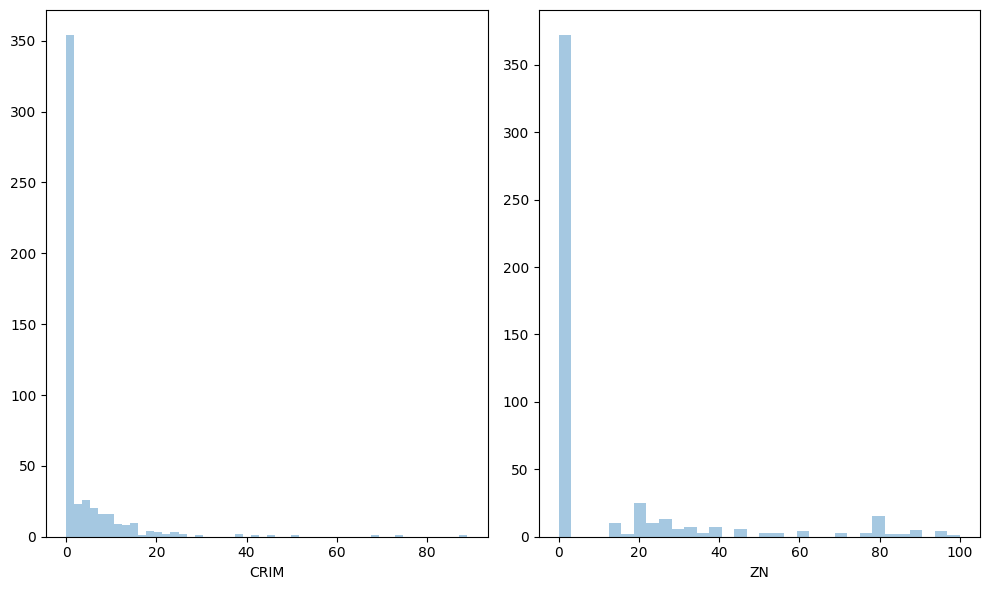

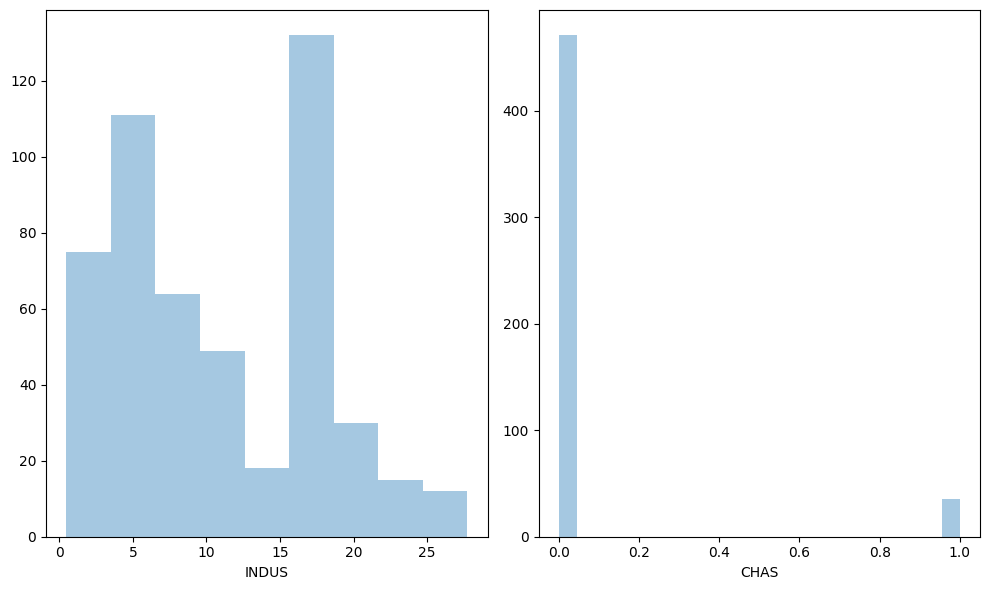

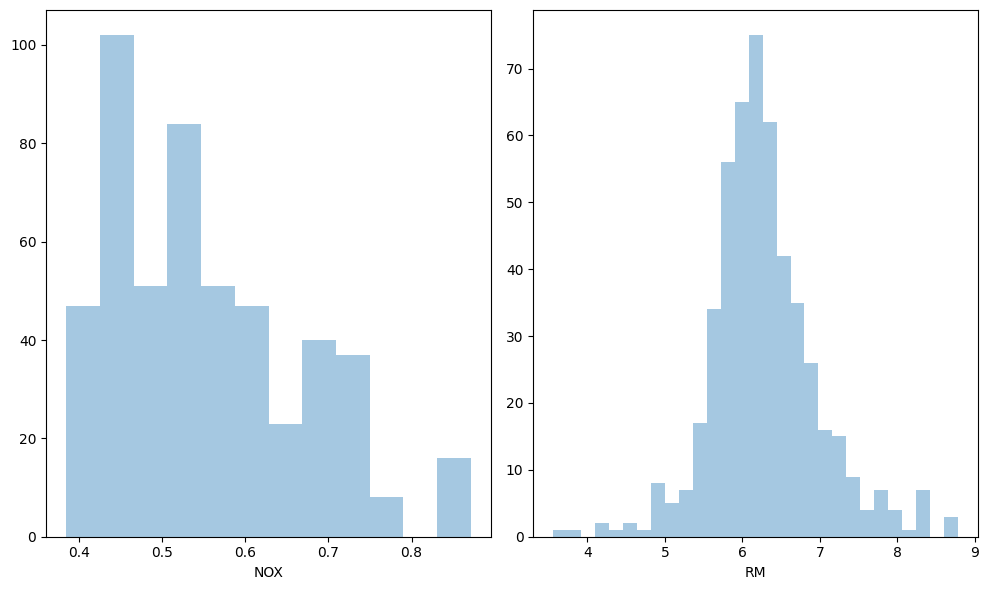

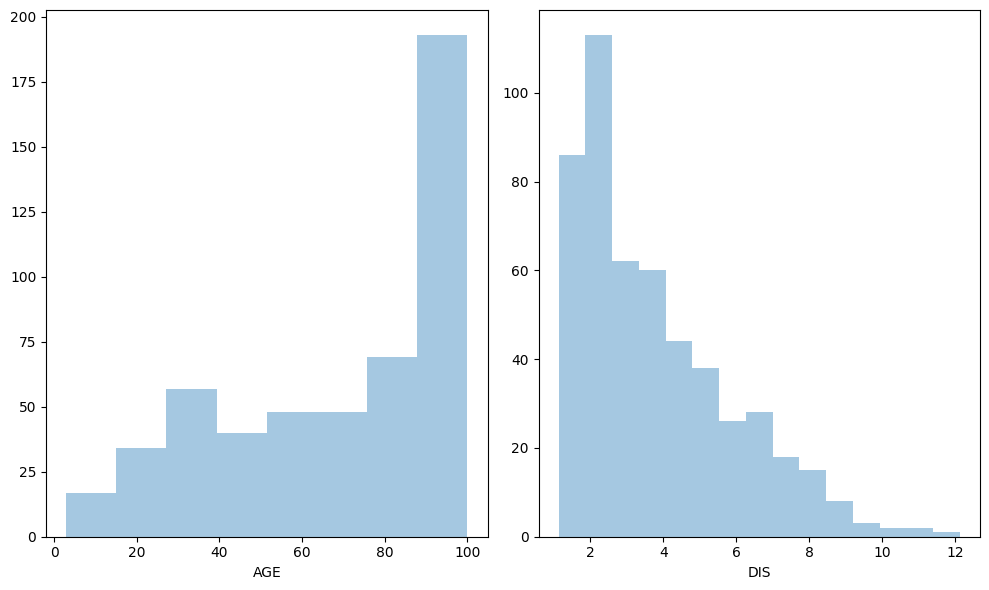

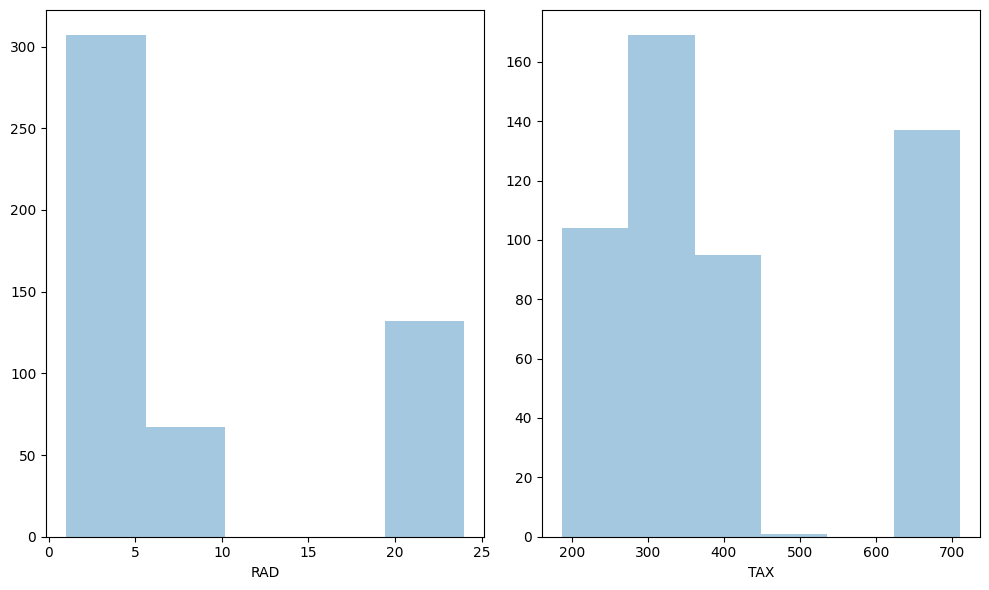

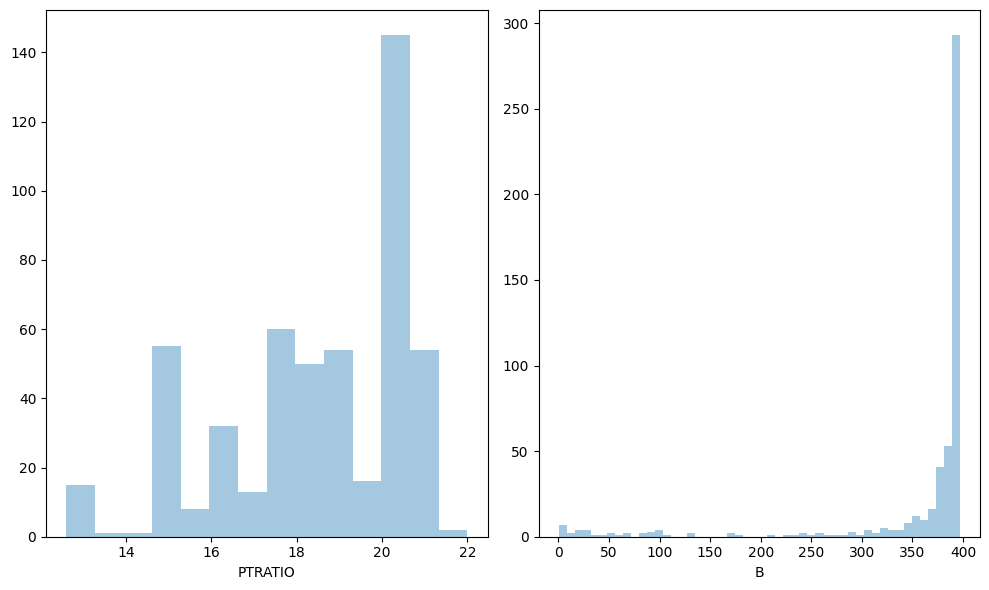

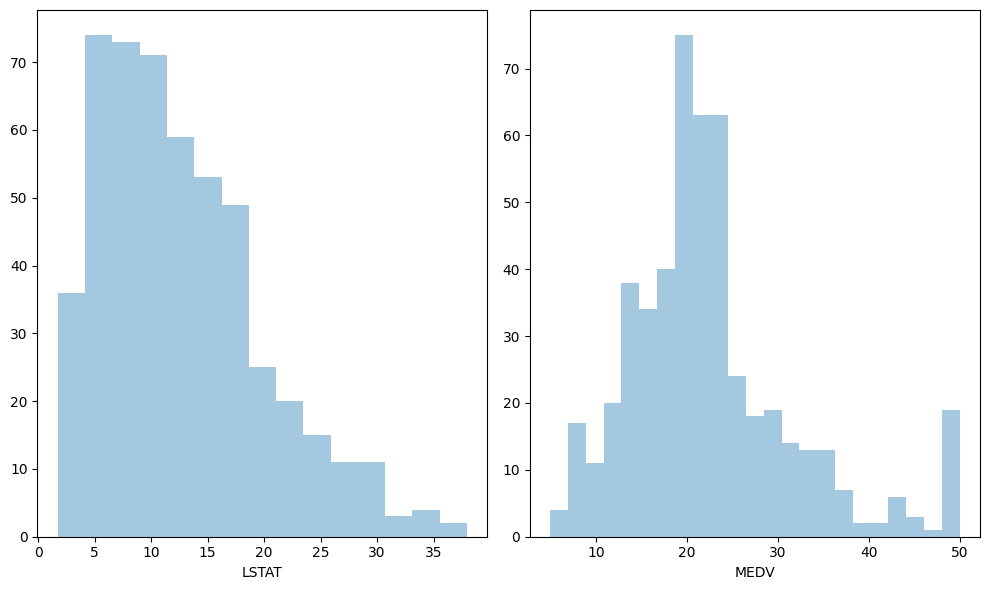


Box Plots



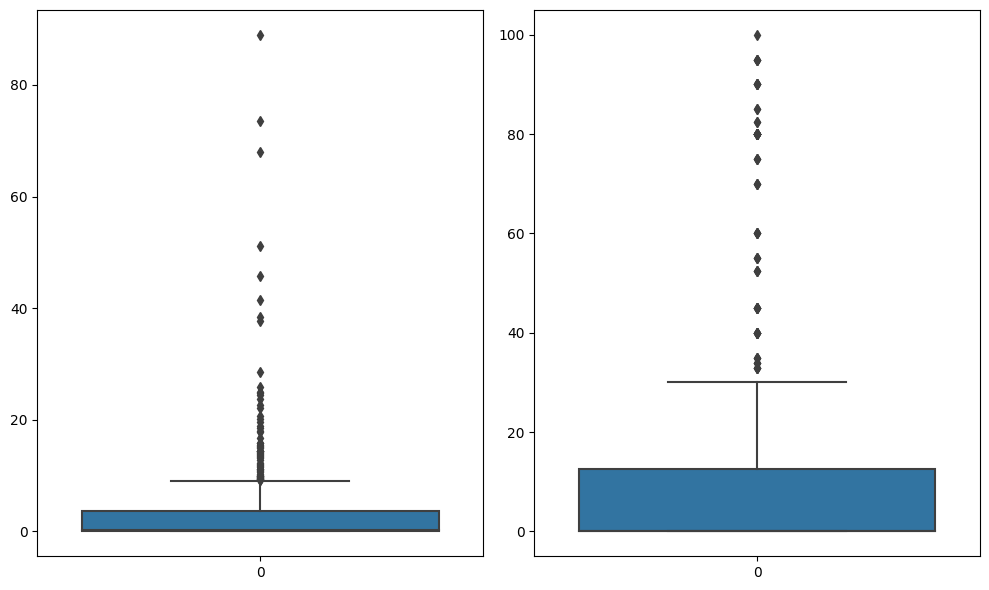

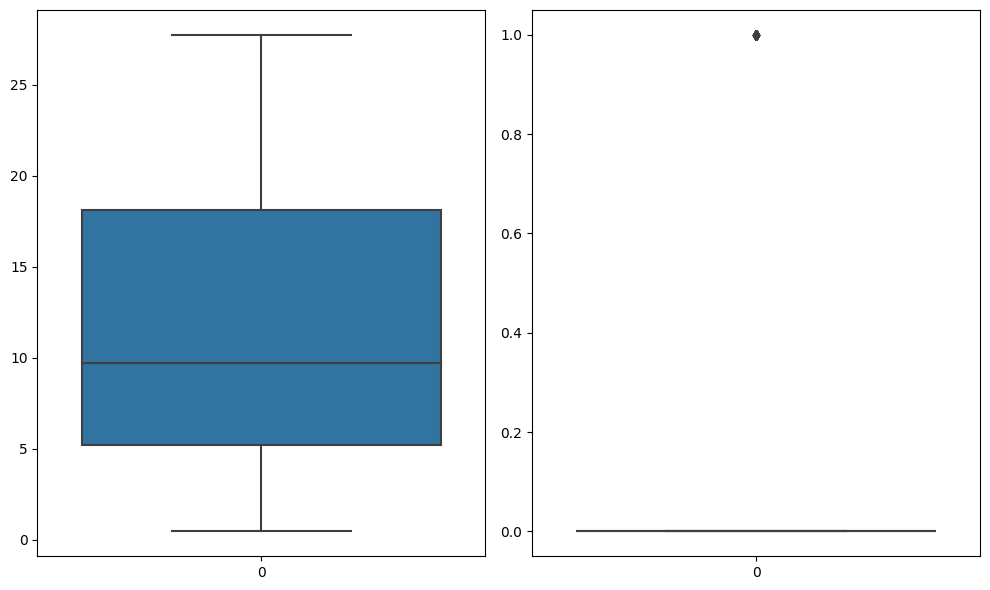

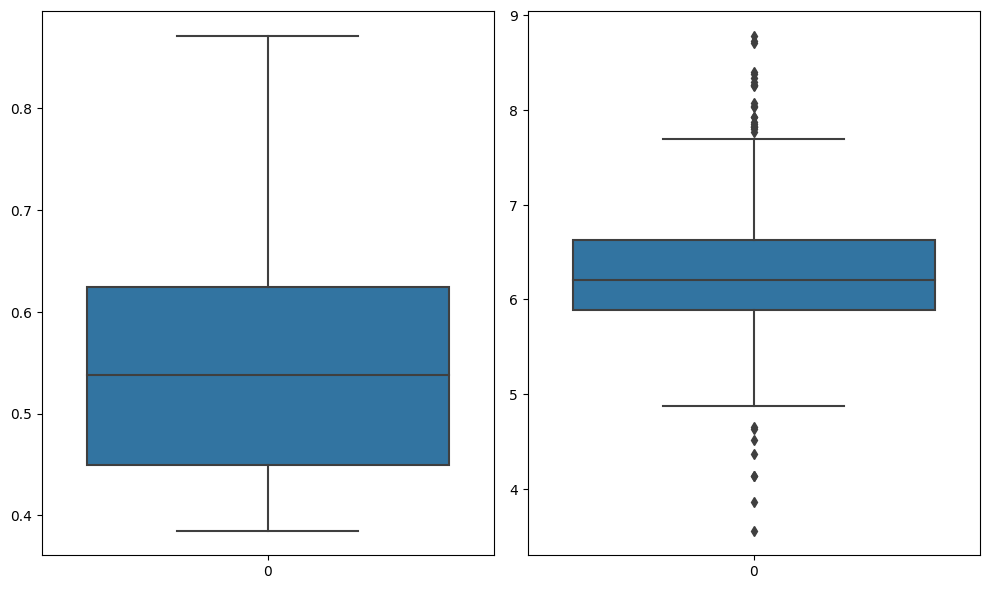

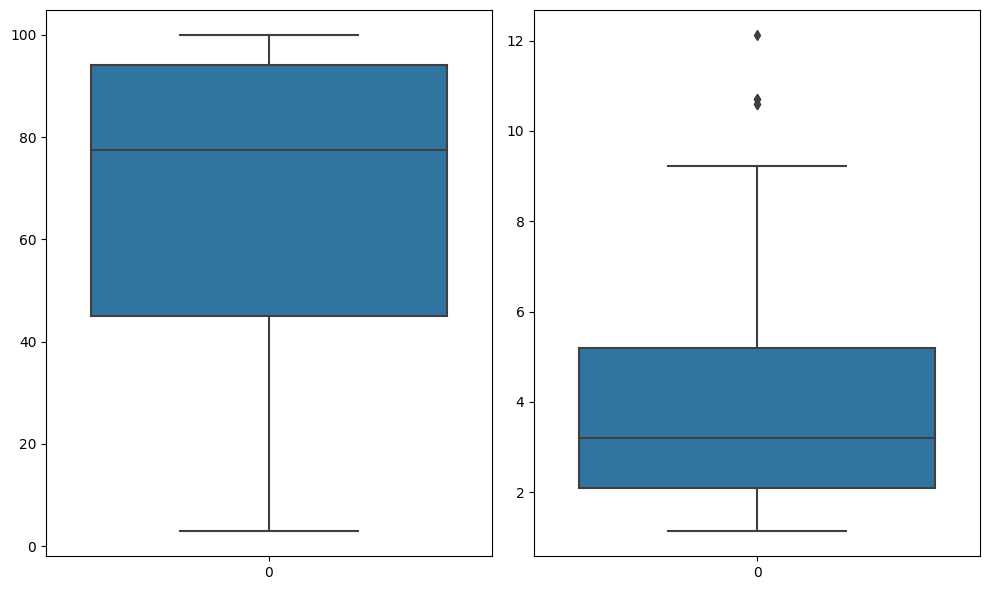

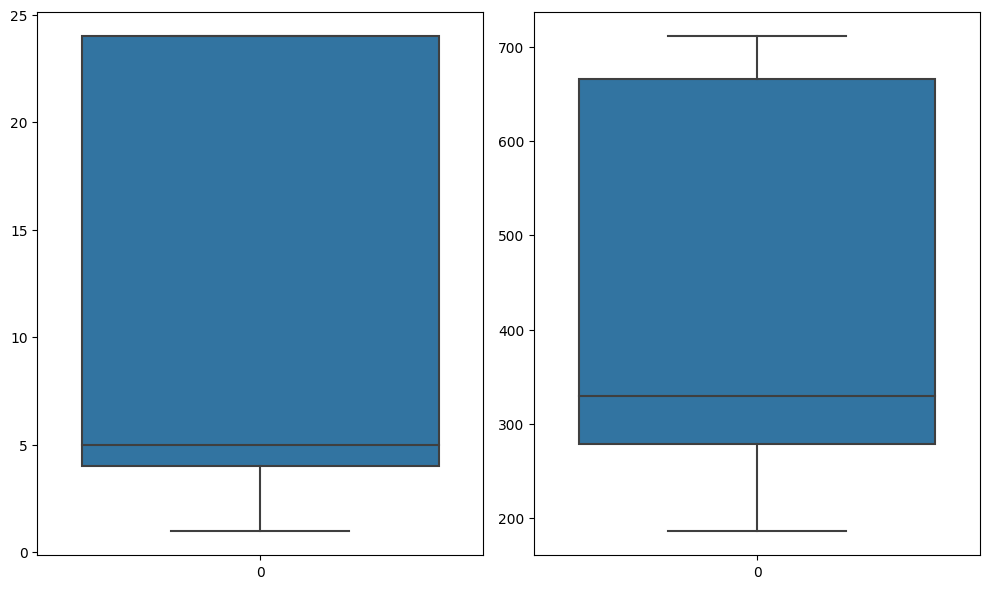

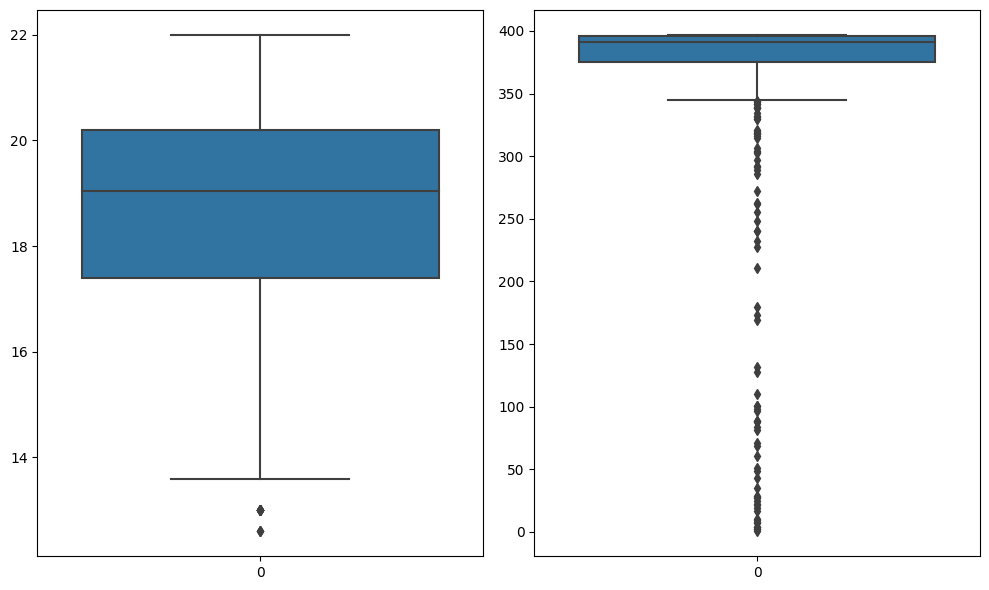

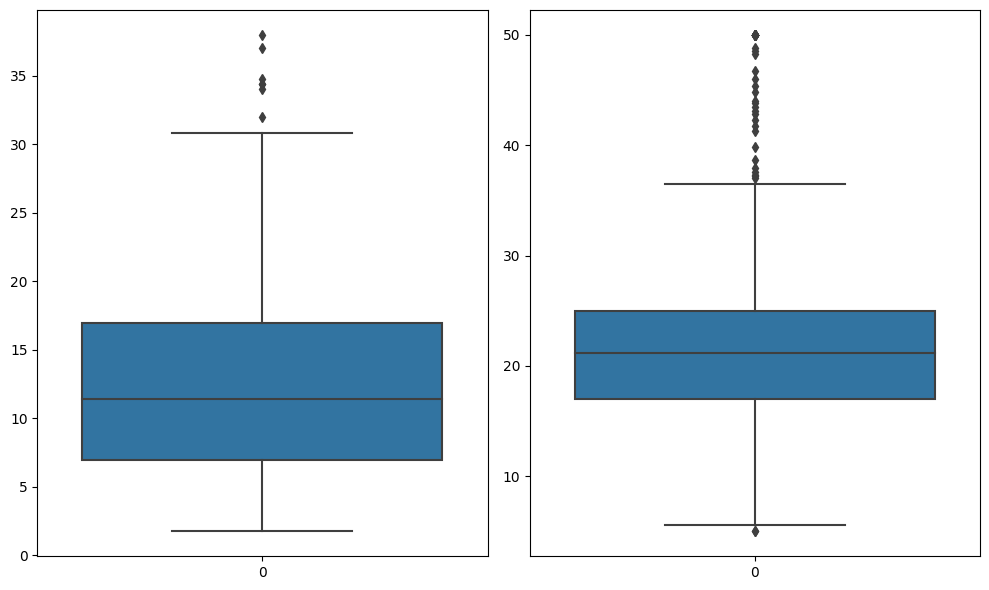

In [131]:
def plot_continuous_columns(dataframe):
    numeric_columns = dataframe.select_dtypes(include=['number']).columns.tolist()
    dataframe = dataframe[numeric_columns]
    
    for i in range(0,len(numeric_columns),2):
        if len(numeric_columns) > i+1:
            plt.figure(figsize=(10,6))
            plt.subplot(121)
            sns.distplot(dataframe[numeric_columns[i]], kde=False)
            plt.subplot(122)            
            sns.distplot(dataframe[numeric_columns[i+1]], kde=False)
            plt.tight_layout()
            plt.show()

        else:
            sns.distplot(dataframe[numeric_columns[i]], kde=False)

def plot_box_plots(dataframe):
    numeric_columns = dataframe.select_dtypes(include=['number']).columns.tolist()
    dataframe = dataframe[numeric_columns]
    
    for i in range(0,len(numeric_columns),2):
        if len(numeric_columns) > i+1:
            plt.figure(figsize=(10,6))
            plt.subplot(121)
            sns.boxplot(dataframe[numeric_columns[i]])
            plt.subplot(122)            
            sns.boxplot(dataframe[numeric_columns[i+1]])
            plt.tight_layout()
            plt.show()

        else:
            sns.boxplot(dataframe[numeric_columns[i]])

    
    
print("Histograms\n")
plot_continuous_columns(df)  

print('\nBox Plots\n')
plot_box_plots(df)

In [132]:
def treat_outliers(dataframe):
    cols = list(dataframe)
    for col in cols:
        if col in dataframe.select_dtypes(include=np.number).columns:
            dataframe[col] = winsorize(dataframe[col], limits=[0.05, 0.1],inclusive=(True, True))
    
    return dataframe    


df = treat_outliers(df)
detect_outliers(df)

Feature Number of Outliers
0      CRIM                 66
1        ZN                 68
2     INDUS                  0
3      CHAS                  0
4       NOX                  0
5        RM                  0
6       AGE                  0
7       DIS                  0
8       RAD                  0
9       TAX                  0
10  PTRATIO                  0
11        B                 77
12    LSTAT                  0
13     MEDV                  0

In [133]:
x = df.iloc[:,:-1]
y = df.iloc[:,-1]

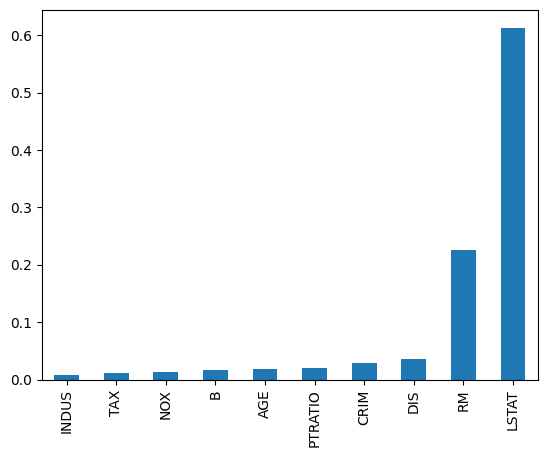

In [134]:
def rfc_feature_selection(dataset,target):
    X_train, X_test, y_train, y_test = train_test_split(dataset, target, test_size=0.3, random_state=42)
    rfc = RandomForestRegressor(random_state=42)
    rfc.fit(X_train, y_train)
    y_pred = rfc.predict(X_test)
    rfc_importances = pd.Series(rfc.feature_importances_, index=dataset.columns).sort_values().tail(10)
    rfc_importances.plot(kind='bar')
    plt.show()

rfc_feature_selection(x,y)

In [135]:
x= x[['CRIM','DIS','RM','LSTAT']]
x.head(10)

CRIM     DIS     RM  LSTAT
0  0.02763  4.0900  6.575   4.98
1  0.02763  4.9671  6.421   9.14
2  0.02763  4.9671  7.155   4.03
3  0.03237  6.0622  6.998   3.70
4  0.06905  6.0622  7.147   5.33
5  0.02985  6.0622  6.430   5.21
6  0.08829  5.5605  6.012  12.43
7  0.14455  5.9505  6.172  19.15
8  0.21124  6.0821  5.631  23.09
9  0.17004  6.5921  6.004  17.10

In [136]:
mms= MinMaxScaler()
x = pd.DataFrame(mms.fit_transform(x), columns=x.columns)
x.head(10)

CRIM       DIS        RM     LSTAT
0  0.000000  0.490733  0.686656  0.066013
1  0.000000  0.654441  0.603458  0.280557
2  0.000000  0.654441  1.000000  0.017019
3  0.000439  0.858839  0.915181  0.000000
4  0.003833  0.858839  0.995678  0.084064
5  0.000205  0.858839  0.608320  0.077875
6  0.005613  0.765198  0.382496  0.450232
7  0.010819  0.837990  0.468936  0.796802
8  0.016991  0.862553  0.176661  1.000000
9  0.013178  0.957743  0.378174  0.691078

In [137]:
xtrain,xtest,ytrain,ytest= train_test_split(x,y,test_size=0.3,random_state=42)

In [138]:
reg = XGBRegressor()
reg.fit(xtrain, ytrain)
y_pred = reg.predict(xtrain)
# Model Evaluation
print('R2_Score:',metrics.r2_score(ytrain, y_pred))
print('Adjusted_R2_Score:',1 - (1-metrics.r2_score(ytrain, y_pred))*(len(ytrain)-1)/(len(ytrain)-xtrain.shape[1]-1))
print('Mean_Absolute_Error:',metrics.mean_absolute_error(ytrain, y_pred))
print('Mean_Squared_Error:',metrics.mean_squared_error(ytrain, y_pred))
print('Root_Mean_Squared_Error:',np.sqrt(metrics.mean_squared_error(ytrain, y_pred)))

R2_Score: 0.9992668041800656
Adjusted_R2_Score: 0.9992584007895793
Mean_Absolute_Error: 0.04419677917566676
Mean_Squared_Error: 0.03777180886951277
Root_Mean_Squared_Error: 0.19434970766510756


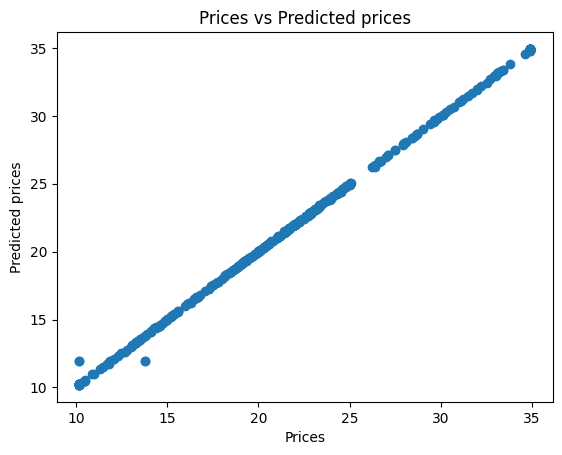

In [139]:
plt.scatter(ytrain, y_pred)
plt.xlabel("Prices")
plt.ylabel("Predicted prices")
plt.title("Prices vs Predicted prices")
plt.show()

In [140]:
y_test_pred = reg.predict(xtest)

acc_xgb = metrics.r2_score(ytest, y_test_pred)
print('R2_Score:', acc_xgb)
print('Adjusted_R2_Score:',1 - (1-metrics.r2_score(ytest, y_test_pred))*(len(ytest)-1)/(len(ytest)-xtest.shape[1]-1))
print('Mean_Absolute_Error:',metrics.mean_absolute_error(ytest, y_test_pred))
print('Mean_Squared_Error:',metrics.mean_squared_error(ytest, y_test_pred))
print('Root_Mean_Squared_Error:',np.sqrt(metrics.mean_squared_error(ytest, y_test_pred)))

R2_Score: 0.787077907595851
Adjusted_R2_Score: 0.781284109163085
Mean_Absolute_Error: 2.0650475476917465
Mean_Squared_Error: 9.428008884499446
Root_Mean_Squared_Error: 3.0705062912326766
